## <center> ML Algorithm: K Nearest Neighbours (KNN)

### Objective:

I will build a KNN class, calculate the accuracy score and side-by-side compare the accuracy score with scikit-learn KNeighborsclassifier class, inshort I will try to build a basic KNN classifier Algorithm from scratch.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# importing our dataset
df = pd.read_csv(r'C:\Users\nilay\OneDrive\Desktop\Dataset\5. Breast cancer dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
# Checking whether my data is balanced or Imbalanced
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
# checking null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# checking 'Unnamed: 32' column
df['Unnamed: 32'].unique()

array([nan])

In [7]:
# I will drop 2 columns named 'Unnamed: 32' and 'id', as it has no use-case in prediction
df.drop(columns=['id','Unnamed: 32'],inplace=True)

### Now let's apply KNN algorithm of scikit-learn class and check the accuracy metrics

In [8]:
# Let's divide our dataset into independent variables (X) and output label (Y)
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis']


In [9]:
# cheking our independent variables (X)
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
# checking the output label (Y)
Y.head(3)

0    M
1    M
2    M
Name: diagnosis, dtype: object

Now since KNN algorithm uses euclidean distances at the backend to categorise the data, we will use standard scaler class of sklearn to scale the data 

In [11]:
# scale the independent variables (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [12]:
# Now dividing our data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [13]:
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('Y_train shape : ',Y_train.shape)
print('Y_test shape : ',Y_test.shape)

X_train shape :  (455, 30)
X_test shape :  (114, 30)
Y_train shape :  (455,)
Y_test shape :  (114,)


In [14]:
# training our data using KNN Algorithm and calculating Y-predicted
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [15]:
# Finally calculating the Accuracy score
accuracy_score(Y_test, Y_pred)

0.9736842105263158

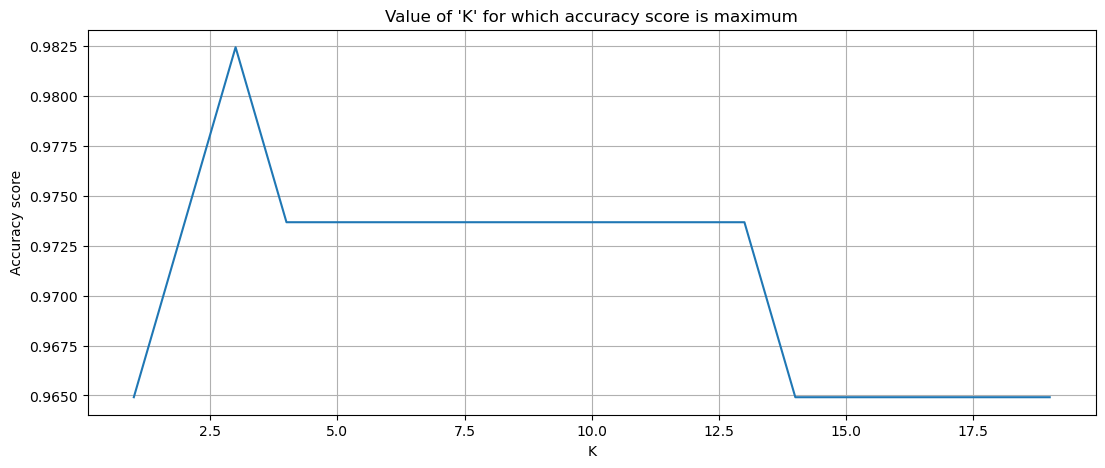

In [16]:
# Let's find out the value of K for which accuracy score is highest
step=[]
score=[]
for i in range(1, 20):
    step.append(i)
    # training the model
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    # calculating accuracy score
    score.append(accuracy_score(Y_test,Y_pred))

plt.figure(figsize = (13,5))
plt.xlabel('K')
plt.ylabel('Accuracy score')
plt.title("Value of 'K' for which accuracy score is maximum")
plt.grid()
sns.lineplot(x=step, y=score);

In [17]:
# Based on the above graph, we can witness that that accuracy score is the highest when value of K = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test, Y_pred)
SKLearn_KNN_algorithm_score = accuracy_score(Y_test,Y_pred)
print('SKLearn KNN algorithm score : ',SKLearn_KNN_algorithm_score)

SKLearn KNN algorithm score :  0.9824561403508771


### Now let's build our own KNN class

In [18]:
class KNN:
    def __init__(self,n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.Y_train = None
        
    def fit(self,A,B):
        self.X_train = A
        self.Y_train = B
        
    def predict(self,C):
        self.X_test = C
        result = []
        for i in self.X_test:
            distance=[]
            for j in self.X_train:
                distance.append(self.distance_calculation(i,j))
            n_neighbors = sorted(list(enumerate(distance)),key=lambda x:x[1])[:self.n_neighbors]
            list_of_output = self.fetch_details(n_neighbors)
            result.append(self.max_count(list_of_output))
        return np.array(result)
                
                
    def distance_calculation(self, pointA, pointB):
        return np.linalg.norm(pointA-pointB)
        
    def fetch_details(self,list_of_tuples):
        index_pos = [tuple_[0] for tuple_ in list_of_tuples]
        return [np.array(self.Y_train)[i] for i in index_pos]
    
    def max_count(self, list_):
        return pd.Series(list_).value_counts().index[0]
            

In [19]:
my_knn = KNN(n_neighbors=3)
my_knn.fit(X_train,Y_train)

In [20]:
y_pred = my_knn.predict(X_test)

In [21]:
print('SKLearn KNN algorithm score : ',SKLearn_KNN_algorithm_score)
print('My algorithm score : ',accuracy_score(Y_test,y_pred))

SKLearn KNN algorithm score :  0.9824561403508771
My algorithm score :  0.9824561403508771


### <center>Since my calculated accuracy score matches the in-built SKLearn KNN accuracy score, it proves that my KNN class is working fine.